# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

In [3]:
df = pd.read_csv('derived_data/train_data_merged.csv')
df.head()

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [6]:
df.shape

(1000000, 9)

# Removing Outliers

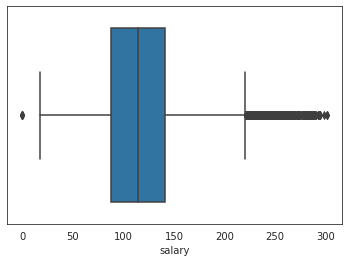

In [4]:
# Box plot of 'salary' using the Seaborn library
sns.boxplot(df.salary)
plt.show()

In [8]:
#Sorting salary and displaying last ten rows
df.salary.sort_values(ascending = True).head(10)

828156     0
652076     0
495984     0
30559      0
816129     0
141942    17
482429    18
807108    18
188931    18
60556     19
Name: salary, dtype: int64

In [9]:
#Sorting salary and displaying last ten rows
df.salary.sort_values(ascending = False).head(10)

400611    301
685562    301
572777    298
293221    294
911747    294
905713    293
503962    293
884902    292
47203     292
377196    290
Name: salary, dtype: int64

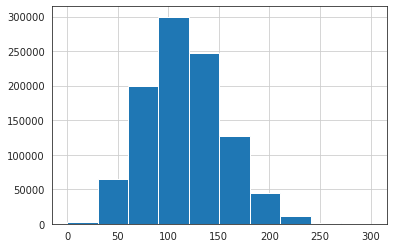

In [5]:
df.salary.hist()

In [11]:
# Select by setting a condition to meet the specific criteria we are selecting with
df[df.salary == df.salary.min()]

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
30559,JOB1362684438246,0,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7
495984,JOB1362684903671,0,COMP34,JUNIOR,NONE,NONE,OIL,1,25
652076,JOB1362685059763,0,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60
816129,JOB1362685223816,0,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6
828156,JOB1362685235843,0,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29


Defining a function to remove all observations with no salaries

In [14]:
def removeZeroSalaries():
    '''Removes all observations with zero salaries'''
    
    global df #Assigns 'df' as a global variable
    
    #Creating a series mask to remove all observations with salary == 0
    mask = df.salary
    series_mask = mask > 0
    mask[series_mask]

    # Remove all outliers with salary == 0
    df = df[df.salary > 0]

In [15]:
#Removing observations with no salaries
removeZeroSalaries()

In [16]:
# df lengths should be reduced by 5
len(df)

999995

In [17]:
#Sorting salary and displaying last ten rows
df.salary.sort_values(ascending = True).head(10)

141942    17
188931    18
807108    18
482429    18
798142    19
207218    19
477468    19
677635    19
60556     19
981967    19
Name: salary, dtype: int64

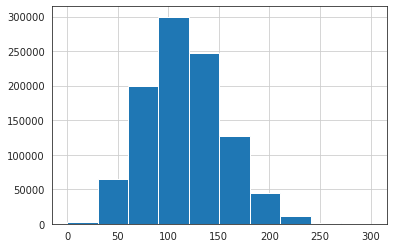

In [6]:
df.salary.hist()

Let's take a look at the distribution of all remaining categorical features

In [19]:
df.head()

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [23]:
df.shape

(999995, 9)

# Saving our Analytical Base Table (ABT)

In [24]:
abt = df

In [25]:
abt.head()

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


Writing our modeling table (abt) to a csv for easier importing on our next steps

In [26]:
abt.to_csv('derived_data/train_data_abt.csv', index=False)